<a href="https://colab.research.google.com/github/cming2/COIL-project-Group-12/blob/main/GROUP_12_OA_COIL_GROUP_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import pandas as pd
import numpy as np
import yfinance as yf


In [ ]:
# Download USD/CHF data from Yahoo Finance
usd_chf = yf.download('CHF=X', start='2021-01-01', end='2024-06-30', interval='1d')

# Keep only the Close price, as 'Adj Close' might not be available due to auto_adjust behavior
usd_chf = usd_chf[['Close']]

# Reset the index so 'Date' is a column
usd_chf = usd_chf.reset_index()

# Show the first 5 rows
usd_chf.head()

/tmp/ipython-input-285296250.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_chf = yf.download('CHF=X', start='2021-01-01', end='2024-06-30', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,CHF=X
0,2021-01-01,0.89810
1,2021-01-04,0.88310
2,2021-01-05,0.88124
3,2021-01-06,0.87818
4,2021-01-07,0.87807


In [ ]:
import yfinance as yf
import pandas as pd

# Download USD/CHF data
usd_chf = yf.download('CHF=X', start='2021-01-01', end='2024-06-30', interval='1d', auto_adjust=False)

# Use 'Close' column instead of 'Adj Close'
usd_chf = usd_chf[['Close']]

# Reset the index so 'Date' is a column
usd_chf = usd_chf.reset_index()

# Show first 5 rows
usd_chf.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,CHF=X
0,2021-01-01,0.89810
1,2021-01-04,0.88310
2,2021-01-05,0.88124
3,2021-01-06,0.87818
4,2021-01-07,0.87807


In [ ]:
# Check how many rows you have
len(usd_chf)


911

In [ ]:
# Calculate daily returns
usd_chf['Daily_Return'] = usd_chf['Close'].pct_change()

# Drop the first row because it will be NaN
usd_chf = usd_chf.dropna()

# Show first 5 rows with returns
usd_chf.head()


Price,Date,Close,Daily_Return
Ticker,,CHF=X,
1,2021-01-04,0.88310,-0.016702
2,2021-01-05,0.88124,-0.002106
3,2021-01-06,0.87818,-0.003472
4,2021-01-07,0.87807,-0.000125
5,2021-01-08,0.88515,0.008063


In [ ]:
# Download US 10-year Treasury yield daily data
interest = yf.download('^TNX', start='2021-01-01', end='2024-06-30', interval='1d', auto_adjust=False)

# Keep only 'Close' and reset index
interest = interest[['Close']].reset_index()

# Rename column to 'Interest_Rate'
interest = interest.rename(columns={'Close': 'Interest_Rate'})

# Show first 5 rows
interest.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Interest_Rate
Ticker,,^TNX
0,2021-01-04,0.917
1,2021-01-05,0.955
2,2021-01-06,1.042
3,2021-01-07,1.071
4,2021-01-08,1.105


In [ ]:
# Download S&P 500 daily data
sp500 = yf.download('^GSPC', start='2021-01-01', end='2024-06-30', interval='1d', auto_adjust=False)

# Keep only 'Close' and reset index
sp500 = sp500[['Close']].reset_index()

# Rename column
sp500 = sp500.rename(columns={'Close': 'SP500_Close'})

# Calculate daily returns
sp500['SP500_Return'] = sp500['SP500_Close'].pct_change()

# Drop first row (NaN)
sp500 = sp500.dropna()

# Show first 5 rows
sp500.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,SP500_Close,SP500_Return
Ticker,,^GSPC,
1,2021-01-05,3726.860107,0.007083
2,2021-01-06,3748.139893,0.005710
3,2021-01-07,3803.790039,0.014847
4,2021-01-08,3824.679932,0.005492
5,2021-01-11,3799.610107,-0.006555


In [ ]:
# Merge USD/CHF + Interest + SP500_Return
df = pd.merge(usd_chf, interest, on='Date', how='inner')
df = pd.merge(df, sp500[['Date','SP500_Return']], on='Date', how='inner')

# Check first 5 rows
df.head()


,Date,"(Date, )","(Close, CHF=X)","(Daily_Return, )","(Interest_Rate, ^TNX)","slice(None, None, None)"
0,2021-01-05,2021-01-05,0.88124,-0.002106,0.955,0.007083
1,2021-01-06,2021-01-06,0.87818,-0.003472,1.042,0.005710
2,2021-01-07,2021-01-07,0.87807,-0.000125,1.071,0.014847
3,2021-01-08,2021-01-08,0.88515,0.008063,1.105,0.005492
4,2021-01-11,2021-01-11,0.88764,0.002813,1.132,-0.006555


In [ ]:
df.columns


Index([                   'Date',              ('Date', ''),
              ('Close', 'CHF=X'),      ('Daily_Return', ''),
       ('Interest_Rate', '^TNX'),   slice(None, None, None)],
      dtype='object')

In [ ]:
# Rename the last column to 'SP500_Return'
df = df.rename(columns={df.columns[-1]: 'SP500_Return'})

# Check the columns
df.columns


Index([                   'Date',              ('Date', ''),
              ('Close', 'CHF=X'),      ('Daily_Return', ''),
       ('Interest_Rate', '^TNX'),            'SP500_Return'],
      dtype='object')

In [ ]:
df.head()


,Date,"(Date, )","(Close, CHF=X)","(Daily_Return, )","(Interest_Rate, ^TNX)",SP500_Return
0,2021-01-05,2021-01-05,0.88124,-0.002106,0.955,0.007083
1,2021-01-06,2021-01-06,0.87818,-0.003472,1.042,0.005710
2,2021-01-07,2021-01-07,0.87807,-0.000125,1.071,0.014847
3,2021-01-08,2021-01-08,0.88515,0.008063,1.105,0.005492
4,2021-01-11,2021-01-11,0.88764,0.002813,1.132,-0.006555


In [ ]:
df.tail()


,Date,"(Date, )","(Close, CHF=X)","(Daily_Return, )","(Interest_Rate, ^TNX)",SP500_Return
871,2024-06-24,2024-06-24,0.89410,0.002928,4.248,-0.003065
872,2024-06-25,2024-06-25,0.89319,-0.001018,4.238,0.003934
873,2024-06-26,2024-06-26,0.89520,0.002250,4.316,0.001572
874,2024-06-27,2024-06-27,0.89670,0.001676,4.288,0.000907
875,2024-06-28,2024-06-28,0.89852,0.002030,4.343,-0.004084


In [ ]:
df.shape


(876, 6)

In [ ]:
!pip install fredapi
from fredapi import Fred

# Replace with your FRED API key
api_key = 'YOUR_API_KEY'
fred = Fred(api_key=api_key)


In [ ]:
from fredapi import Fred

api_key = '978cfa22c41a135660cb70b21d132089'  # your API key
fred = Fred(api_key=api_key)

# Download US CPI (monthly)
cpi = fred.get_series('CPIAUCSL', observation_start='2021-01-01', observation_end='2024-06-30')

# Convert to DataFrame
cpi = cpi.to_frame().reset_index()
cpi.columns = ['Date', 'CPI']

# Convert Date to datetime
cpi['Date'] = pd.to_datetime(cpi['Date'])

# Calculate monthly % change (Inflation Rate)
cpi['Inflation_Rate'] = cpi['CPI'].pct_change()

# Drop first row (NaN)
cpi = cpi.dropna()

# Forward-fill monthly inflation to daily
cpi_daily = cpi.set_index('Date').resample('D').ffill().reset_index()

# Keep only Date and Inflation_Rate
cpi_daily = cpi_daily[['Date', 'Inflation_Rate']]

cpi_daily.head()


,Date,Inflation_Rate
0,2021-02-01,0.003556
1,2021-02-02,0.003556
2,2021-02-03,0.003556
3,2021-02-04,0.003556
4,2021-02-05,0.003556


In [ ]:
df = pd.merge(df, cpi_daily, on='Date', how='inner')
df.head()


,Date,"(Date, )","(Close, CHF=X)","(Daily_Return, )","(Interest_Rate, ^TNX)",SP500_Return,Inflation_Rate
0,2021-02-01,2021-02-01,0.89136,0.003096,1.077,0.016052,0.003556
1,2021-02-02,2021-02-02,0.89648,0.005744,1.105,0.013898,0.003556
2,2021-02-03,2021-02-03,0.89750,0.001138,1.131,0.001009,0.003556
3,2021-02-04,2021-02-04,0.89834,0.000936,1.139,0.010853,0.003556
4,2021-02-05,2021-02-05,0.90403,0.006334,1.170,0.003897,0.003556


In [ ]:
df.head()      # first 5 rows
df.tail()      # last 5 rows
df.shape       # number of rows and columns
df.info()      # check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   839 non-null    datetime64[ns]
 1   (Date, )               839 non-null    datetime64[ns]
 2   (Close, CHF=X)         839 non-null    float64       
 3   (Daily_Return, )       839 non-null    float64       
 4   (Interest_Rate, ^TNX)  839 non-null    float64       
 5   SP500_Return           839 non-null    float64       
 6   Inflation_Rate         839 non-null    float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 46.0 KB


In [ ]:
# Drop the duplicate date column (the tuple one)
df = df.drop(columns=[('Date', '')])

# Rename columns to simpler names
df = df.rename(columns={
    ('Close', 'CHF=X'): 'Close',
    ('Daily_Return', ''): 'Daily_Return',
    ('Interest_Rate', '^TNX'): 'Interest_Rate'
})

df.head()

,Date,Close,Daily_Return,Interest_Rate,SP500_Return,Inflation_Rate
0,2021-02-01,0.89136,0.003096,1.077,0.016052,0.003556
1,2021-02-02,0.89648,0.005744,1.105,0.013898,0.003556
2,2021-02-03,0.89750,0.001138,1.131,0.001009,0.003556
3,2021-02-04,0.89834,0.000936,1.139,0.010853,0.003556
4,2021-02-05,0.90403,0.006334,1.170,0.003897,0.003556


In [ ]:
df.columns.tolist()


['Date',
 'Close',
 'Daily_Return',
 'Interest_Rate',
 'SP500_Return',
 'Inflation_Rate']

In [ ]:
df.columns = ['Date', 'Close', 'Daily_Return', 'Interest_Rate', 'SP500_Return', 'Inflation_Rate']


In [ ]:
df.columns.tolist()


['Date',
 'Close',
 'Daily_Return',
 'Interest_Rate',
 'SP500_Return',
 'Inflation_Rate']

In [ ]:
['Date', '(Date, )', '(Close, CHF=X)', '(Daily_Return, )', '(Interest_Rate, ^TNX)', 'SP500_Return', 'Inflation_Rate']


['Date',
 '(Date, )',
 '(Close, CHF=X)',
 '(Daily_Return, )',
 '(Interest_Rate, ^TNX)',
 'SP500_Return',
 'Inflation_Rate']

In [ ]:
df.columns.tolist()


['Date',
 'Close',
 'Daily_Return',
 'Interest_Rate',
 'SP500_Return',
 'Inflation_Rate']

In [ ]:
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
# List files in current directory to confirm
!ls


cleaned_data.csv  sample_data


In [ ]:
pd.read_csv('cleaned_data.csv').head()


,Date,Close,Daily_Return,Interest_Rate,SP500_Return,Inflation_Rate
0,2021-02-01,0.89136,0.003096,1.077,0.016052,0.003556
1,2021-02-02,0.89648,0.005744,1.105,0.013898,0.003556
2,2021-02-03,0.89750,0.001138,1.131,0.001009,0.003556
3,2021-02-04,0.89834,0.000936,1.139,0.010853,0.003556
4,2021-02-05,0.90403,0.006334,1.170,0.003897,0.003556


In [ ]:
import yfinance as yf
import pandas as pd

# 1. Download CHF/USD exchange rate
usd_chf = yf.download('CHF=X', start='2021-01-01', end='2024-06-30', interval='1d', auto_adjust=True)

# Ensure columns are flattened if they are MultiIndex (common with yfinance output)
if isinstance(usd_chf.columns, pd.MultiIndex):
    # Flatten the MultiIndex to a single level, joining elements with '_'
    usd_chf.columns = ['_'.join(col).strip() if col[1] else col[0] for col in usd_chf.columns.values]

# Reset the index to make 'Date' a regular column, and rename it explicitly
usd_chf = usd_chf.reset_index()
# The index from yfinance is typically named 'Date', so reset_index() will make a 'Date' column.
# The following rename is generally not needed for yfinance data, but included for robustness if 'index' appears.
if 'index' in usd_chf.columns:
    usd_chf.rename(columns={'index': 'Date'}, inplace=True)

# Select only 'Date' and the appropriate 'Close' column
# The 'Close' column might be named 'Close' or 'Close_CHF=X' after flattening.
if 'Close' in usd_chf.columns:
    selected_close_col = 'Close'
elif 'Close_CHF=X' in usd_chf.columns:
    selected_close_col = 'Close_CHF=X'
else:
    raise KeyError("Could not find a 'Close' column (or 'Close_CHF=X') in the USD/CHF data.")

usd_chf = usd_chf[['Date', selected_close_col]]
usd_chf.rename(columns={selected_close_col: 'Close'}, inplace=True)

# Ensure 'Date' is datetime
usd_chf['Date'] = pd.to_datetime(usd_chf['Date'])

# 2. Calculate daily returns
usd_chf['Daily_Return'] = usd_chf['Close'].pct_change()
usd_chf = usd_chf.dropna()

# 3. Handle Interest Rate and S&P500 DataFrames: ensure their column names are flat.
# The existing code already attempts to clean these, but let's re-confirm.
interest.columns = ['Date', 'Interest_Rate'] # This assumes 'interest' was properly loaded and only needs these two columns
sp500.columns = ['Date', 'SP500_Close', 'SP500_Return'] # This assumes 'sp500' was properly loaded and only needs these three columns

# Convert Date columns to datetime for all DataFrames
interest['Date'] = pd.to_datetime(interest['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])
# cpi_daily['Date'] is already datetime

# 4. Merge datasets on Date
df = usd_chf.merge(interest[['Date', 'Interest_Rate']], on='Date', how='inner') \
             .merge(sp500[['Date', 'SP500_Return']], on='Date', how='inner') \
             .merge(cpi_daily[['Date', 'Inflation_Rate']], on='Date', how='inner')

# 5. Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# 6. Save cleaned dataset for modeling
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_data.csv'. Shape:", df.shape)

# Optional: peek at first 5 rows
df.head()

[*********************100%***********************]  1 of 1 completed

Missing values in each column:
Date              0
Close             0
Daily_Return      0
Interest_Rate     0
SP500_Return      0
Inflation_Rate    0
dtype: int64
Cleaned dataset saved as 'cleaned_data.csv'. Shape: (839, 6)


,Date,Close,Daily_Return,Interest_Rate,SP500_Return,Inflation_Rate
0,2021-02-01,0.89136,0.003096,1.077,0.016052,0.003556
1,2021-02-02,0.89648,0.005744,1.105,0.013898,0.003556
2,2021-02-03,0.89750,0.001138,1.131,0.001009,0.003556
3,2021-02-04,0.89834,0.000936,1.139,0.010853,0.003556
4,2021-02-05,0.90403,0.006334,1.170,0.003897,0.003556


In [ ]:
# Assume you already have these DataFrames:
# df -> contains Close and Daily_Return
# interest -> interest rate DataFrame
# sp500 -> S&P500 DataFrame
# inflation -> CPI DataFrame

# Make sure all Date columns are datetime
df['Date'] = pd.to_datetime(df['Date'])
interest['Date'] = pd.to_datetime(interest['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])
cpi_daily['Date'] = pd.to_datetime(cpi_daily['Date']) # Corrected from inflation to cpi_daily

# Merge everything on 'Date'
df = df.merge(interest, on='Date', how='inner') \
       .merge(sp500, on='Date', how='inner') \
       .merge(cpi_daily, on='Date', how='inner') # Corrected from inflation to cpi_daily

# Check missing values
print(df.isnull().sum())

# Save cleaned dataset
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset ready! Shape:", df.shape)

Date                0
Close               0
Daily_Return        0
Interest_Rate_x     0
SP500_Return_x      0
Inflation_Rate_x    0
Interest_Rate_y     0
SP500_Close         0
SP500_Return_y      0
Inflation_Rate_y    0
dtype: int64
Cleaned dataset ready! Shape: (839, 10)


In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Save cleaned dataset for the team
df.to_csv('cleaned_data.csv', index=False)
print("Data Manager work done! Shape:", df.shape)


Date                0
Close               0
Daily_Return        0
Interest_Rate_x     0
SP500_Return_x      0
Inflation_Rate_x    0
Interest_Rate_y     0
SP500_Close         0
SP500_Return_y      0
Inflation_Rate_y    0
dtype: int64
Data Manager work done! Shape: (839, 10)


In [ ]:
df.to_csv('/content/cleaned_data.csv', index=False)


In [ ]:
import pandas as pd
import os


if 'cleaned_data.csv' in os.listdir():
    print("✅ ¡El archivo existe! Cargando datos...")
    df = pd.read_csv('cleaned_data.csv')


    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    print(f"Datos listos. Tenemos {len(df)} días de datos.")
    print(df.head())
else:
    print("❌ Error: No encuentro 'cleaned_data.csv'. Asegúrate de haber ejecutado el código de la Data Manager primero.")


✅ ¡El archivo existe! Cargando datos...
Datos listos. Tenemos 839 días de datos.
        Date    Close  Daily_Return  Interest_Rate_x  SP500_Return_x  \
0 2021-02-01  0.89136      0.003096            1.077        0.016052   
1 2021-02-02  0.89648      0.005744            1.105        0.013898   
2 2021-02-03  0.89750      0.001138            1.131        0.001009   
3 2021-02-04  0.89834      0.000936            1.139        0.010853   
4 2021-02-05  0.90403      0.006334            1.170        0.003897   

   Inflation_Rate_x  Interest_Rate_y  SP500_Close  SP500_Return_y  \
0          0.003556            1.077  3773.860107        0.016052   
1          0.003556            1.105  3826.310059        0.013898   
2          0.003556            1.131  3830.169922        0.001009   
3          0.003556            1.139  3871.739990        0.010853   
4          0.003556            1.170  3886.830078        0.003897   

   Inflation_Rate_y  
0          0.003556  
1          0.003556  
2    

In [ ]:
import os
os.listdir()


['.config', 'cleaned_data.csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')
df.head()


,Date,Close,Daily_Return,Interest_Rate_x,SP500_Return_x,Inflation_Rate_x,Interest_Rate_y,SP500_Close,SP500_Return_y,Inflation_Rate_y
0,2021-02-01,0.89136,0.003096,1.077,0.016052,0.003556,1.077,3773.860107,0.016052,0.003556
1,2021-02-02,0.89648,0.005744,1.105,0.013898,0.003556,1.105,3826.310059,0.013898,0.003556
2,2021-02-03,0.89750,0.001138,1.131,0.001009,0.003556,1.131,3830.169922,0.001009,0.003556
3,2021-02-04,0.89834,0.000936,1.139,0.010853,0.003556,1.139,3871.739990,0.010853,0.003556
4,2021-02-05,0.90403,0.006334,1.170,0.003897,0.003556,1.170,3886.830078,0.003897,0.003556


In [ ]:

!pip install xgboost


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data.csv')


df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

print("Datos cargados correctamente. Filas:", len(df))
df.head()

Datos cargados correctamente. Filas: 839


,Date,Close,Daily_Return,Interest_Rate_x,SP500_Return_x,Inflation_Rate_x,Interest_Rate_y,SP500_Close,SP500_Return_y,Inflation_Rate_y
0,2021-02-01,0.89136,0.003096,1.077,0.016052,0.003556,1.077,3773.860107,0.016052,0.003556
1,2021-02-02,0.89648,0.005744,1.105,0.013898,0.003556,1.105,3826.310059,0.013898,0.003556
2,2021-02-03,0.89750,0.001138,1.131,0.001009,0.003556,1.131,3830.169922,0.001009,0.003556
3,2021-02-04,0.89834,0.000936,1.139,0.010853,0.003556,1.139,3871.739990,0.010853,0.003556
4,2021-02-05,0.90403,0.006334,1.170,0.003897,0.003556,1.170,3886.830078,0.003897,0.003556


In [ ]:

y = df['Daily_Return']


features = ['Interest_Rate_x', 'SP500_Return_x', 'Inflation_Rate_x']
X = df[features]


split_point = int(len(df) * 0.80)

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

print(f"Training: {X_train.shape[0]} days")
print(f"Test: {X_test.shape[0]} days")

Training: 671 days
Test: 168 days


In [ ]:


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


model.fit(X_train, y_train)

print("XGBoost model sucessfully trained!")

XGBoost model sucessfully trained!


Evaluation results (Test Set):
RMSE (Root Mean Squared Error): 0.00571
MAE (Mean Absolute Error): 0.00444


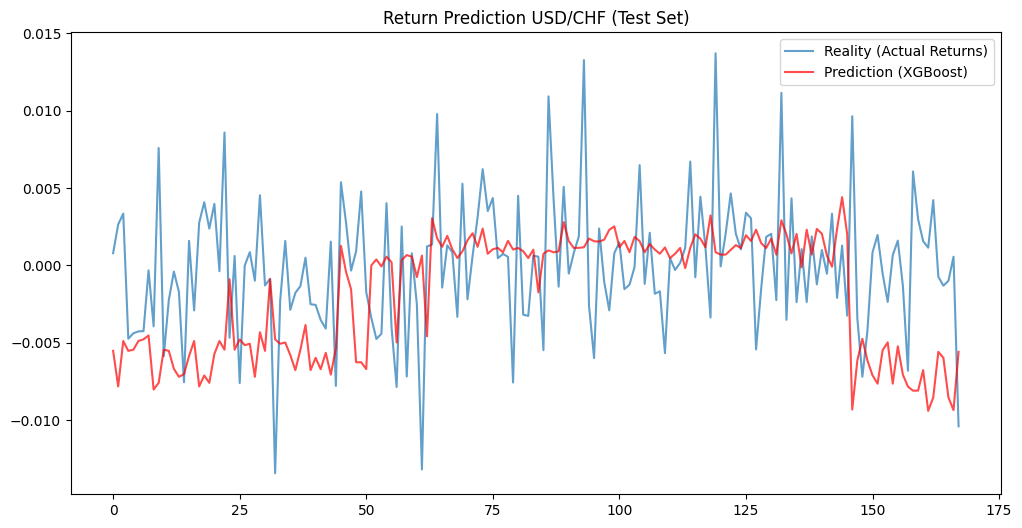

In [ ]:

predictions = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f"Evaluation results (Test Set):")
print(f"RMSE (Root Mean Squared Error): {rmse:.5f}")
print(f"MAE (Mean Absolute Error): {mae:.5f}")


plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Reality (Actual Returns)', alpha=0.7)
plt.plot(predictions, label='Prediction (XGBoost)', alpha=0.7, color='red')
plt.title("Return Prediction USD/CHF (Test Set)")
plt.legend()
plt.show()

In [ ]:
!pip install shap

Generating SHAP summary plot (bar) for overall feature importance...


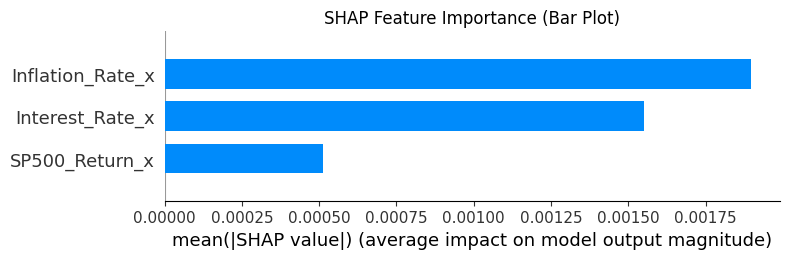

Generating SHAP summary plot for detailed feature impact...


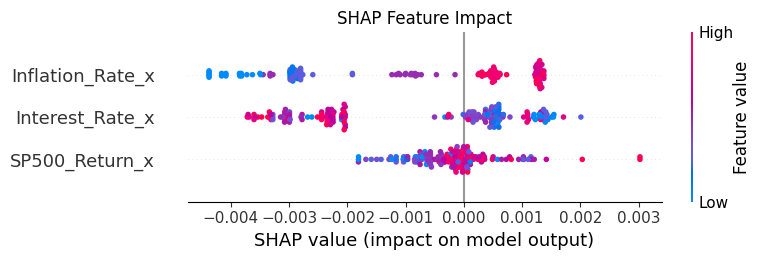

In [ ]:
import shap

# Initialize SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test features
shap_values = explainer.shap_values(X_test)

# Generate a SHAP summary plot for overall feature importance (bar plot)
print("Generating SHAP summary plot (bar) for overall feature importance...")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar Plot)")
plt.tight_layout()
plt.show()

# Generate a detailed SHAP summary plot for feature impact
print("Generating SHAP summary plot for detailed feature impact...")
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Feature Impact")
plt.tight_layout()
plt.show()


The SHAP feature importance plot shows that Inflation Rate is the strongest contributor to the model’s predictions of daily currency returns, followed by the Interest Rate, while SP500 returns have the weakest impact.
Although the overall magnitudes are small, this reflects the nature of daily financial data, where currency returns are highly volatile and influenced by many unobservable short-run factors.

The SHAP summary plot indicates that higher inflation values tend to slightly increase the predicted return, suggesting some sensitivity of the currency to inflation changes. Interest rate movements also show a positive relationship with predicted returns, consistent with economic theory that higher interest rates attract foreign capital and strengthen a currency.
In contrast, S&P500 returns show minimal variation in SHAP values, implying that global equity market performance has limited explanatory power for daily currency return fluctuations.